In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 36.5 MB/s eta 0:00:00


In [4]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import torch.nn as nn
import torch
from torchvision import transforms, datasets
from PIL import Image, ImageDraw, ImageFont
from torch.utils.data import Dataset, DataLoader
from ultralytics import YOLO
from IPython import display
import random

In [5]:
#activate gpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [6]:
#dirs
data = "/kaggle/input/fruit-detection/Fruits-detection"

traindir    = os.path.join(data, 'train/images')
trainlabels = os.path.join(data,'train/labels') 

valdir    = os.path.join(data,'valid/images') 
vallabels = os.path.join(data,'valid/labels' )

In [7]:
traindir

'/kaggle/input/fruit-detection/Fruits-detection/train/images'

In [8]:
def files(images, labels):
    image_files = glob.glob(os.path.join(images, '*.jpg'))
    labels_files = glob.glob(os.path.join(labels, '*.txt'))
    
    return image_files, labels_files

In [9]:
#files
train_image_files, train_labels_files = files(traindir, trainlabels)
val_image_files, val_labels_files = files(valdir, vallabels)

train_image_files.sort()
train_labels_files.sort()
val_image_files.sort()
val_labels_files.sort()

In [10]:
print(len(train_image_files), len(train_labels_files))

7108 7108


In [14]:
class dataset(Dataset):
    def __init__(self, image_paths, label_paths, transform=None, draw_box= False):
        self.image_paths = image_paths
        self.label_paths = label_paths
        self.transform = transform
        self.draw_box = draw_box
        
    def __getitem__(self, index):
        image_path = self.image_paths[index]
        label_path = self.label_paths[index]
        
        labels = []
        image = Image.open(image_path)
        image = image.resize((300, 300))
        draw = ImageDraw.Draw(image)

        classes = ['Apple', 'Banana', 'Grape', 'Orange', 'Pineapple', 'Watermelon'] 
        colors = ['yellow', 'red', 'pink', 'green', 'blue', 'orange']
        # Open the file and read its content
        with open(label_path, 'r') as file:
            lines = file.readlines()

        for line in lines:
            if line.strip():
                parts = line.strip().split()
                class_num = int(parts[0])
                x_center = float(parts[1])
                y_center = float(parts[2])
                width = float(parts[3])
                height = float(parts[4])

                x_min = int((x_center - width / 2) * 300)
                y_min = int((y_center - height / 2) * 300)
                x_max = int((x_center + width / 2) * 300)
                y_max = int((y_center + height / 2) * 300)

                labels.append((class_num, x_min, y_min, x_max, y_max))
                if self.draw_box == True:
                    draw.rectangle([x_min, y_min, x_max, y_max], outline= colors[class_num], width=10)
                    draw.text((x_min, y_min), f"{classes[class_num]}", fill= 'white')

        if self.transform:
            image = self.transform(image)

        return image, labels
            
    def __len__(self):
        return len(self.image_paths)

In [15]:
train_dataset = dataset(train_image_files, train_labels_files, None, True)
val_dataset = dataset(val_image_files, val_labels_files, None, False)

# SHOW SOME IMAGES WITH THEIR BOUDNING BOXES

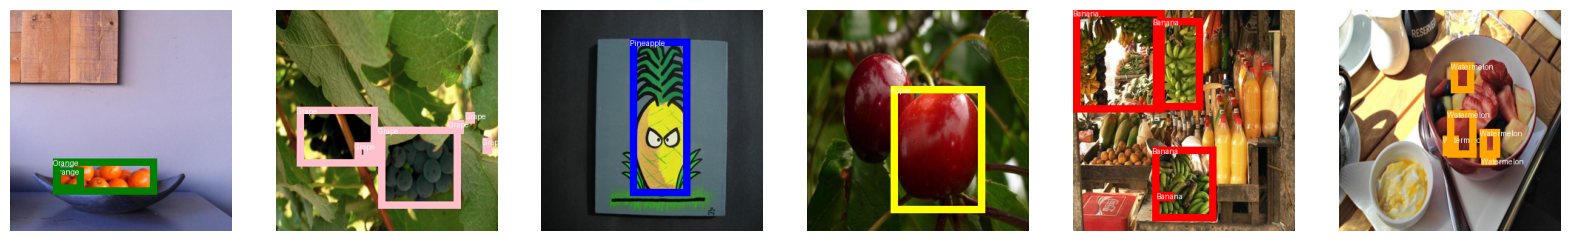

In [16]:
indxs = [603,160, 900, 20, 446, 80]
temp =0
fig, axes = plt.subplots(1, 6, figsize=(20, 10))
for i in indxs:
        image, labels = train_dataset[i]
        axes[temp].imshow(image)
        axes[temp].axis('off')
        temp = temp +1
        
plt.show()

In [ ]:
import yaml
from pathlib import Path
import wandb
wandb.init(mode='disabled')


data = {
    'train': "/kaggle/input/fruit-detection/Fruits-detection/train",
    'val': "/kaggle/input/fruit-detection/Fruits-detection/valid",
    'names' : 
        ['Apple',
         'Banana',
         'Grape',
         'Orange',
         'Pineapple', 
         'Watermelon' ]
}

with open('data.yaml', 'w') as file:
    yaml.dump(data, file)

yaml_path = 'data.yaml'

model = YOLO('yolov8n')
model.train(data=yaml_path, imgsz=300, batch=16, epochs=200)

Ultralytics 8.3.47 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=300, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, li

train: Scanning /kaggle/input/fruit-detection/Fruits-detection/train/labels... 7108 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7108/7108 [00:08<00:00, 828.47it/s]

train: WARNING ⚠️ /kaggle/input/fruit-detection/Fruits-detection/train/images/3d8be4f881b8c54c_jpg.rf.0d7b6d095459cece040b47b246d807af.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/input/fruit-detection/Fruits-detection/train/images/3d8be4f881b8c54c_jpg.rf.64e869a9bedd5f012cc2a1129c6ca229.jpg: 1 duplicate labels removed


train: WARNING ⚠️ Cache directory /kaggle/input/fruit-detection/Fruits-detection/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/fruit-detection/Fruits-detection/valid/labels... 914 images, 0 backgrounds, 0 corrupt: 100%|██████████| 914/914 [00:01<00:00, 741.72it/s]

val: WARNING ⚠️ /kaggle/input/fruit-detection/Fruits-detection/valid/images/3d3ddc3054b32eb7_jpg.rf.03e7789aaf5212e2634b84ef502e0832.jpg: 1 duplicate labels removed


val: WARNING ⚠️ Cache directory /kaggle/input/fruit-detection/Fruits-detection/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 4 dataloader workers
Logging results to runs/detect/train2
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      1.78G      1.173      3.051      1.265         31        320: 100%|██████████| 445/445 [00:47<00:00,  9.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:05<00:00,  5.18it/s]


                   all        914       3227      0.226      0.182      0.125     0.0721

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      1.83G      1.142      1.977      1.238         30        320: 100%|██████████| 445/445 [00:45<00:00,  9.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.22it/s]


                   all        914       3227       0.31      0.253      0.188      0.108

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      1.81G      1.169      1.864      1.229         33        320: 100%|██████████| 445/445 [00:44<00:00, 10.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.44it/s]


                   all        914       3227      0.283      0.263      0.179     0.0905

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      1.84G      1.215      1.873      1.244         20        320: 100%|██████████| 445/445 [00:43<00:00, 10.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.56it/s]


                   all        914       3227      0.321      0.285      0.199      0.105

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      1.79G      1.189      1.765      1.227         21        320: 100%|██████████| 445/445 [00:43<00:00, 10.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.46it/s]


                   all        914       3227      0.348      0.281      0.221      0.125

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      1.79G      1.156      1.684      1.214         18        320: 100%|██████████| 445/445 [00:43<00:00, 10.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.37it/s]


                   all        914       3227      0.385       0.29      0.249      0.151

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      1.79G      1.122        1.6      1.202        110        320:  16%|█▋        | 73/445 [00:07<00:36, 10.06it/s]

In [ ]:
model.val(data=yaml_path)

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
# # Đọc ảnh gốc (label) và ảnh dự đoán (prediction)
# val_label = Image.open("./runs/detect/train11/val_batch1_labels.jpg")
# val_pred = Image.open("./runs/detect/train11/val_batch1_pred.jpg") 

# # Tạo figure và thiết lập kích thước
# plt.figure(figsize=(20, 10))

# # Vẽ ảnh label (gốc)
# plt.subplot(1, 2, 1)  # 1 hàng, 2 cột, ảnh đầu tiên
# plt.imshow(val_label)
# plt.title("Label")
# plt.axis('off')  # Tắt trục tọa độ

# # Vẽ ảnh prediction
# plt.subplot(1, 2, 2)  # 1 hàng, 2 cột, ảnh thứ hai
# plt.imshow(val_pred)
# plt.title("Prediction")
# plt.axis('off')  # Tắt trục tọa độ

# # Hiển thị ảnh
# plt.tight_layout()  # Đảm bảo khoảng cách giữa các ảnh không bị chồng lấn
# plt.show()

In [ ]:
# # Đọc ảnh gốc (label) và ảnh dự đoán (prediction)
# val_label = Image.open("./runs/detect/train11/val_batch2_labels.jpg")
# val_pred = Image.open("./runs/detect/train11/val_batch2_pred.jpg") 

# # Tạo figure và thiết lập kích thước
# plt.figure(figsize=(20, 10))

# # Vẽ ảnh label (gốc)
# plt.subplot(1, 2, 1)  # 1 hàng, 2 cột, ảnh đầu tiên
# plt.imshow(val_label)
# plt.title("Label")
# plt.axis('off')  # Tắt trục tọa độ

# # Vẽ ảnh prediction
# plt.subplot(1, 2, 2)  # 1 hàng, 2 cột, ảnh thứ hai
# plt.imshow(val_pred)
# plt.title("Prediction")
# plt.axis('off')  # Tắt trục tọa độ

# # Hiển thị ảnh
# plt.tight_layout()  # Đảm bảo khoảng cách giữa các ảnh không bị chồng lấn
# plt.show()

In [ ]:
# # Đọc ảnh gốc (label) và ảnh dự đoán (prediction)
# val_label = Image.open("./runs/detect/train11/val_batch0_labels.jpg")
# val_pred = Image.open("./runs/detect/train11/val_batch0_pred.jpg") 

# # Tạo figure và thiết lập kích thước
# plt.figure(figsize=(20, 10))

# # Vẽ ảnh label (gốc)
# plt.subplot(1, 2, 1)  # 1 hàng, 2 cột, ảnh đầu tiên
# plt.imshow(val_label)
# plt.title("Label")
# plt.axis('off')  # Tắt trục tọa độ

# # Vẽ ảnh prediction
# plt.subplot(1, 2, 2)  # 1 hàng, 2 cột, ảnh thứ hai
# plt.imshow(val_pred)
# plt.title("Prediction")
# plt.axis('off')  # Tắt trục tọa độ

# # Hiển thị ảnh
# plt.tight_layout()  # Đảm bảo khoảng cách giữa các ảnh không bị chồng lấn
# plt.show()

In [ ]:
model.save('YOLOV8_BEST.pt')